### GW tutorial 2: Detector noise and GW150914

Author: Melissa Lopez

Email: m.lopez@uu.nl

Note that we are importing some packages to be able to read the data.

In [8]:
#!pip install pycbc # run if needed, im using colab so there is no terminal

In [9]:
%matplotlib inline
from pycbc.catalog import Merger
import pycbc.psd
import pylab
import matplotlib.pyplot as plt
import numpy as np

In the previous part we have seen the detector response to gravitational waves (GW). Currently, we have three ground-based detectors: LIGO Hanford (H1), LIGO Livingston (L1) and Virgo (V1). But what does the data actually look like?

To answer this question we are going to take a look at the first detection: **GW150914**. Let's load the data from L1

In [6]:
m = Merger('GW150914')
ifo = 'L1'
data = m.strain(ifo)

**Exercise 1:** We can see that this object is a PyCBC timeseries, and as such you can check what their atributes are (see [here](https://pycbc.org/pycbc/latest/html/pycbc.types.html#module-pycbc.types.timeseries)). Let's check some of them.

- How much is the duration of the time series?

- How much is its sampling rate?

- How many data points does it have?

- How much is $\Delta_{f}$ and $\Delta_{t}$? Can you find a relation between these and the number of data points?

_Hint:_ $\Delta_{f} = 1/duration$ and  $\Delta_{t} = 1/sample\_rate$

In [7]:
# prompt: help me do the exercise

# Print the duration of the time series
print("Duration:", data.duration, "s")

# Print the sampling rate of the time series
print("Sampling rate:", data.sample_rate, "Hz")

# Print the number of data points in the time series
print("Number of data points:", len(data))


# Calculate delta_f and delta_t
delta_f = 1 / data.duration
delta_t = 1 / data.sample_rate
print("Data filter ?? : ",data.filter_psd(1, delta_f, 1))
# Print delta_f and delta_t
print("Delta f:", delta_f)
print("Delta t:", delta_t)
#duration = data.duration
# Check the relationship between delta_f, delta_t, and the number of data points
# delta_f * number_of_points = sample_rate (approximately)
# delta_t * number_of_points = duration (approximately)
print("delta_f * number of data points:", delta_f * len(data))
print("delta_t * number of data points:", delta_t * len(data))


Duration: 32.0 s
Sampling rate: 4096.0 Hz
Number of data points: 131072
Data filter ?? :  [2.56290993e-39 2.60569078e-39 2.74072734e-39 ... 1.15222738e-50
 1.15153080e-50 1.15129856e-50]
Delta f: 0.03125
Delta t: 0.000244140625
delta_f * number of data points: 4096.0
delta_t * number of data points: 32.0


The previous magnitudes are key parameters of the timeseries. Now, let's plot the actual data to see what it looks like.

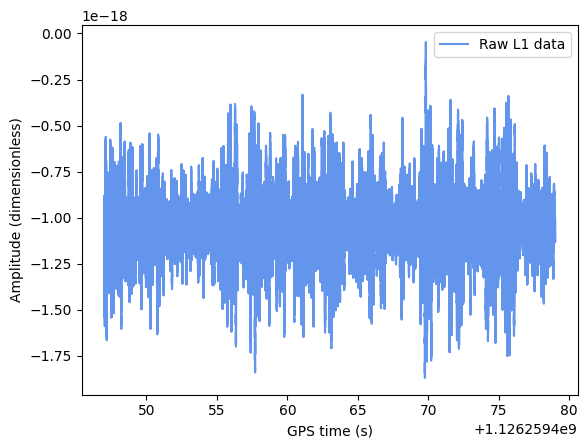

In [10]:
plt.plot(data.sample_times, data, label='Raw L1 data', color='cornflowerblue')
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude (dimensionless)')
plt.legend()

In GW we use the GPS time to determine at what time the GW signals reached Earth. You can see that the amplitude of this data is super small, $\mathcal{O}(10^{-18})$! GW interferometers are able to detect a change in distance of ~1/10,000th the size of a proton.

But, where is GW190514? We cannot see it (yet) as there are many different contributions from the detector. The detector has a given "noise budget" given  by the power spectral density (PSD), $S_{n}(f)$, according to its specific design.

**Exercise 2**: Estimate the PSD of the data using `filter_psd` (see [here](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.filter_psd)) and plot it. Limit your plot according to the minimum frequency (say, 1 Hz) and  the Nyquist frequency.

_Hint_: Note that the PSD is a frequency series.

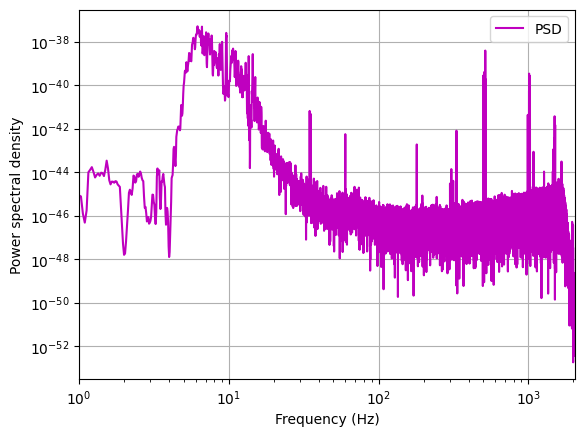

In [11]:
# prompt: t according to the minimum frequency (say, 1 Hz) and the Nyquist frequency.

# Estimate the PSD of the data using filter_psd
psd = data.filter_psd(data.duration, delta_f, 1)

# Define the minimum and maximum frequencies for the plot
fmin = 1  # Hz
fmax = data.sample_rate / 2  # Nyquist frequency

# Find indices for frequencies within the defined range
indices = np.where((psd.sample_frequencies >= fmin) & (psd.sample_frequencies <= fmax))

# Plot the PSD within the defined frequency range
plt.plot(psd.sample_frequencies[indices], psd[indices], label='PSD', color='m')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density')
plt.xscale('log')
plt.yscale('log')
plt.xlim(fmin, fmax)
plt.legend()
plt.grid(True)
plt.show()


The PSD shows us what are the different contributions of the detector noise.
While we computed the PSD from 1 Hz, you can see that there is a weird behaviour for frequencies < 5 Hz. This is because the detector is not calibrated at these frequencies, so our analysis needs to start at higher frequencies. For current ground based detectors, we usually start at 10 Hz or higher, depending on the source.

GW signals are tiny, so with this much noise we won't be able to see GW150914. To "flatten" all frequency contributions we whiten the data.

**Exercise 3:** We can whiten the data with [this](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.whiten) function. Use `segment_duration = 4` and `max_filter_duration=4`.

- Plot the whitened data next to the raw detector noise. What differences can you see?

- Estimate the PSD of the whitened data. Plot it in the same graph as the raw PSD. What differences can you see?


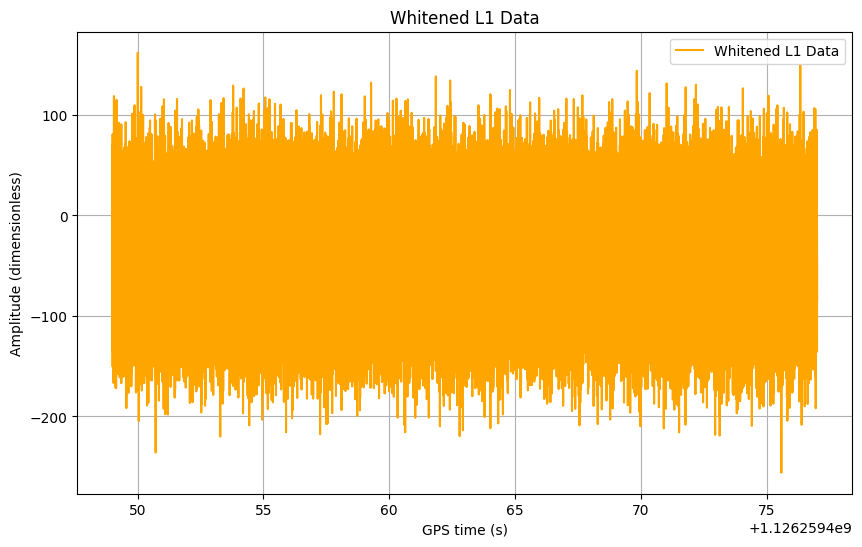

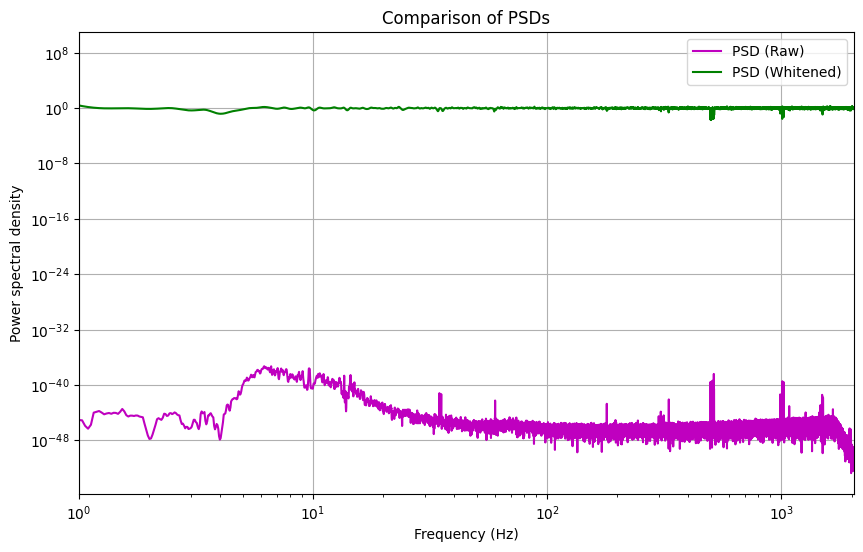

In [12]:
from pycbc.psd import welch
# Whiten the data
whitened_data = data.whiten(4, 4)

# Plot whitened data
plt.figure(figsize=(10, 6)) #added figure size
plt.plot(whitened_data.sample_times, whitened_data, label='Whitened L1 Data', color='orange') #change color
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude (dimensionless)')
plt.legend()
plt.title('Whitened L1 Data') #added title
plt.grid(True) #added grid
plt.show()

# Estimate and plot PSD of whitened data
#whitened_psd = whitened_data.filter_psd(data.duration, delta_f, 1)
#delta_f = 1 / whitened_data.duration

   # Estimate and plot PSD of whitened data
whitened_psd = whitened_data.filter_psd(4, delta_f, 1)

# Plot the PSDs



plt.figure(figsize=(10, 6)) #added figure size
plt.plot(psd.sample_frequencies[indices], psd[indices], label='PSD (Raw)', color='m')
plt.plot(whitened_psd.sample_frequencies, whitened_psd, label='PSD (Whitened)', color='g')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density')
plt.xscale('log')
plt.yscale('log')
plt.xlim(fmin, fmax)
plt.legend()
plt.grid(True)
plt.title('Comparison of PSDs') #added title
plt.show()


Now all frequency contributions are at the same level, as we can see from the PSD. However, GW150914 is still hidden in the data.


**Exercise 4:** We can apply a [low pass filter](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.lowpass_fir) and a [high pass filter](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.highpass_fir) to limit the frequency of the data. The low pass filters above 250 Hz (order=512) and the high pass filters below 30 Hz (order=512).

- Estimate the PSD of the bandpassed data and plot it together with the raw PSD and the whitened PSD. What is the bandpass doing?

- Plot the bandpassed data [cropping](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.crop) 12s on the left and 13s on the right. What can you see? Compare this to the raw data. What frequencies dominate in each case?

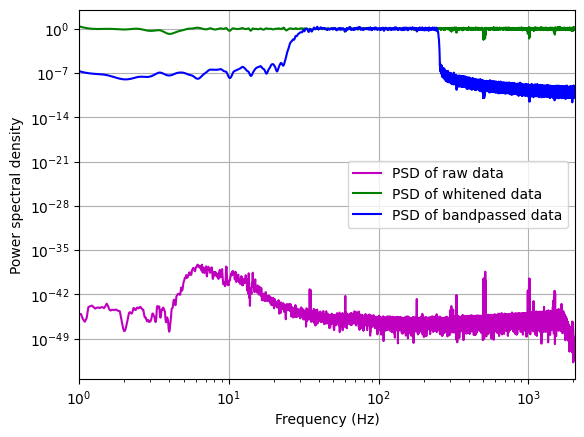

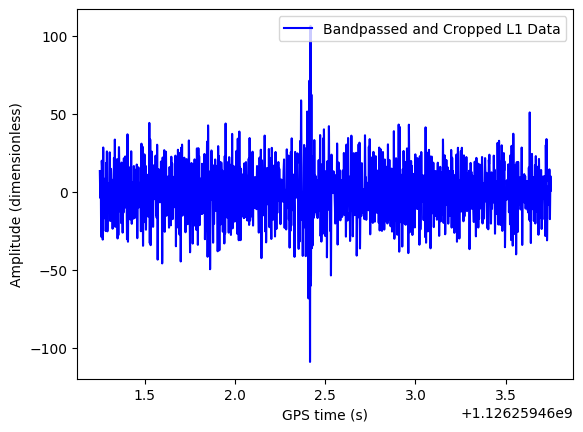

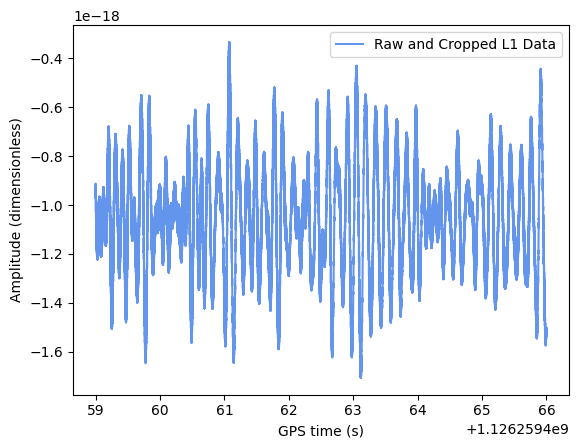

In [14]:
low_pass_data = whitened_data.lowpass_fir(250, 512)# -pass and high-pass filters
bandpassed_data = low_pass_data.highpass_fir(30, 512)
segment_duration = 4
# Estimate the PSD of the bandpassed data
bandpassed_psd = bandpassed_data.filter_psd(segment_duration, delta_f, 1)

# Plot the PSDs of the raw, whitened, and bandpassed data
plt.plot(psd.sample_frequencies[indices], psd[indices], label='PSD of raw data', color='m')
plt.plot(whitened_psd.sample_frequencies[indices], whitened_psd[indices], label='PSD of whitened data', color='g')
plt.plot(bandpassed_psd.sample_frequencies[indices], bandpassed_psd[indices], label='PSD of bandpassed data', color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density')
plt.xscale('log')
plt.yscale('log')
plt.xlim(fmin, fmax)
plt.legend()
plt.grid(True)
plt.show()

# Crop the bandpassed data
cropped_data = bandpassed_data.crop(12, 13)

# Plot the cropped bandpassed data
plt.plot(cropped_data.sample_times, cropped_data, label='Bandpassed and Cropped L1 Data', color='b')
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude (dimensionless)')
plt.legend()
plt.show()

# Plot the raw data for comparison (cropped to the same time range)
cropped_raw_data = data.crop(12,13)
plt.plot(cropped_raw_data.sample_times, cropped_raw_data, label='Raw and Cropped L1 Data', color = 'cornflowerblue')
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude (dimensionless)')
plt.legend()
plt.show()


**Exercise 5:** Last but not least, we generate a spectrogram (time-frequency representation) using [this](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.qtransform) function.

_Hint_: logfsteps=200, qrange=(110, 110), frange=(20, 512), vmax=3.5 as it is standard

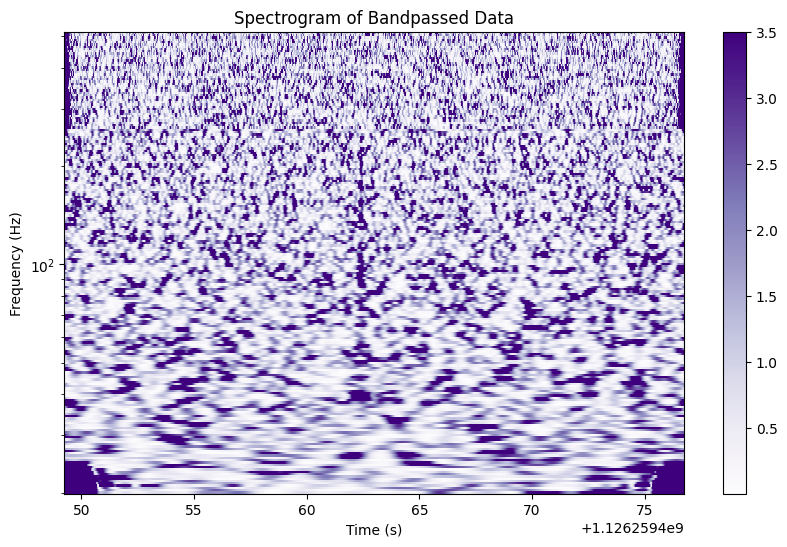

In [15]:
# Use the TimeSeries.qtransform method with specified parameters
# logfsteps=200, qrange=(110, 110), frange=(20, 512), vmax=3.5
times, freqs, power = bandpassed_data.qtransform(logfsteps=200, qrange=(110, 110), frange=(20, 512))

# Plot the spectrogram using the pcolormesh function
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, freqs, power, vmax=3.5, cmap = 'Purples')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.yscale('log')
plt.colorbar()
plt.title('Spectrogram of Bandpassed Data')
plt.show()


As we have seen, the detector has a given "noise budget" given  by the power spectral density (PSD), $S_{n}(f)$, according to its specific design. Let's see how the detectors will improve in the next observing runs.

**Bonus track:** From the `sensitivity_curves` folder [load](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.read.from_txt) the PSD s:

- Third observing run of H1: `aligo_O3actual_H1.txt`
- Third observing run of L1: `aligo_O3actual_L1.txt`
- Third observing run of V1: `avirgo_O3actual.txt`
- Simulated fourth observing run of LIGO: `aligo_O4high.txt`

Note that these PSDs are from [LIGO public website](https://dcc.ligo.org/ligo-t2000012/public). Also read the PSD of [Einstein Telescope](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.analytical.EinsteinTelescopeP1600143) (ET) and [Cosmic Explorer](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.analytical.CosmicExplorerP1600143) (CE)

Plot all these PSDs. What can you say about ET and CE improvements?

_Hint_: Minimum frequency is 10 Hz, sampling rate 8192 Hz and duration is 16s.


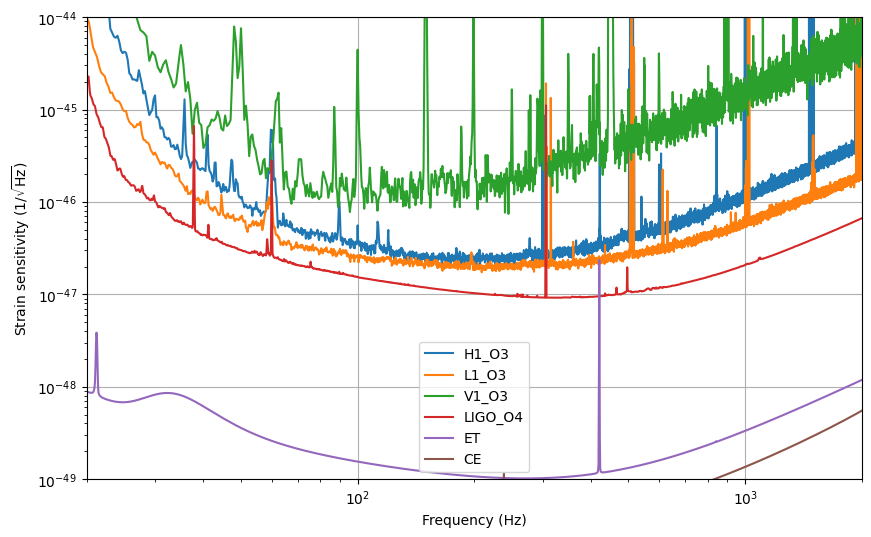

In [25]:
# prompt: do the bonus trackd

from pycbc.psd import read, EinsteinTelescopeP1600143, CosmicExplorerP1600143
import matplotlib.pyplot as plt
import numpy as np

# Load PSDs from files, providing the required arguments
# Minimum frequency is 10 Hz, sampling rate 8192 Hz and duration is 16s.
delta_f = 1.0 / 16  # Frequency resolution
flen = int(8192 / (2 * delta_f)) + 1  # Number of frequency bins
# The low_freq_cutoff is causing the error. Check the aligo_O4high.txt file
# to find the actual lowest frequency present in the data.
# For demonstration, we assume the actual lowest frequency is 20 Hz.
low_freq_cutoff = 20  # Lowest frequency, adjusted to be compatible with the data

psds = {}
psds['H1_O3'] = read.from_txt('aligo_O3actual_H1.txt', flen, delta_f, low_freq_cutoff)
psds['L1_O3'] = read.from_txt('aligo_O3actual_L1.txt', flen, delta_f, low_freq_cutoff)
psds['V1_O3'] = read.from_txt('avirgo_O3actual.txt', flen, delta_f, low_freq_cutoff)
psds['LIGO_O4'] = read.from_txt('aligo_O4high.txt', flen, delta_f, low_freq_cutoff)


# Define parameters for ET and CE PSDs - these are generated differently
delta_f = 1.0 / 16
flen = int(8192 / (2 * delta_f)) + 1
frequencies = np.arange(flen) * delta_f

# Generate ET and CE PSDs
psds['ET'] = EinsteinTelescopeP1600143(flen, delta_f, low_freq_cutoff) # Change low_freq_cutoff here as well
psds['CE'] = CosmicExplorerP1600143(flen, delta_f, low_freq_cutoff) # Change low_freq_cutoff here as well


# Plot all PSDs
plt.figure(figsize=(10, 6))
for label, psd in psds.items():
    if label in ['ET', 'CE']:
        plt.loglog(frequencies, psd, label=label)
    else:
        plt.loglog(psd.sample_frequencies, psd, label=label)

plt.xlim(low_freq_cutoff, 2000) # Changed xlim to start at low_freq_cutoff
plt.ylim(1e-49, 1e-44)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Strain sensitivity ($1/\sqrt{\mathrm{Hz}}$)')
plt.legend()
plt.grid(True)
plt.show()

Good job! This is the end of the second part. Maybe you can go for a break?